# TP3 numpy et matplolib - HMLA310
***
> __Auteur__: Joseph Salmon ---
> <joseph.salmon@umontpellier.fr>

# Exercice 1:
**Dynamique d'une population population avec migrations internes**

In [1]:
# import os
# import sys
# # # utile pour avoir un affichage identique dans divers notebook
# # sys.path.append? # 

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# commande "magique" pour améliorer la visualiation
%matplotlib notebook
# %matplotlib inline

In [3]:
# Changer ici par votre Prenom Nom:
prenom = "Joseph"  # à remplacer
nom = "Salmon"  # à remplacer
extension = ".ipynb"
tp = "TP3_HMLA310"

In [4]:
# utiliser filename pour votre nom de TP
filename = "_".join([tp, prenom, nom]) + extension
filename = filename.lower()
print(filename)

tp3_hmla310_joseph_salmon.ipynb


## Question: création d'une fonction pour calculer l'évolution de la population.

In [5]:
def population_array(n, pop_init, tau_0, tau_1):
    total_pop = np.zeros((n + 1, 2))
    total_pop[0, :] = pop_init
    Mat = np.array([[(1 - tau_0), tau_1], [tau_0, (1 - tau_1)]])
    if n == 0:
        return total_pop, Mat
    else:
        for i in range(0, n):
            total_pop[i + 1, :] = Mat.dot(total_pop[i, :])
    return total_pop, Mat

In [6]:
u_0 = 51
r_0 = 9.
pop_init = np.array([r_0, u_0])
tau_0 = 0.3  # taux d'exode rural
tau_1 = 0.1  # taux d'exode urbain
n = 10
pop, Mat = population_array(n, pop_init, tau_0, tau_1)
annee = np.arange(0, n + 1)

## Question: affichage graphique de l'évolution de la population

<IPython.core.display.Javascript object>


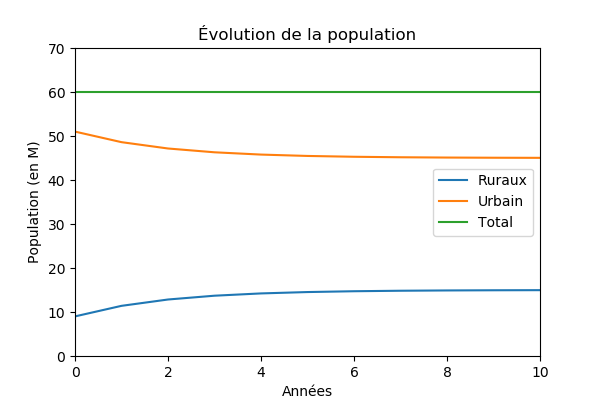

In [7]:
fig = plt.figure(figsize=(6, 4))
plt.plot(annee,pop)
plt.title('Évolution de la population')
plt.xlabel('Années')
plt.ylim(0, 70)     # set the xlim to left, right
plt.xlim(0, n)     # set the xlim to left, right
plt.ylabel('Population (en M)')
plt.legend(['Ruraux', 'Urbain'])

## Question: ajout de la somme totale (constante)

In [9]:
total = np.sum(pop, axis=1)

In [10]:
plt.plot(annee, total)
plt.legend(['Ruraux', 'Urbain', 'Total'])

## Question: affichage graphique cumulé

<IPython.core.display.Javascript object>


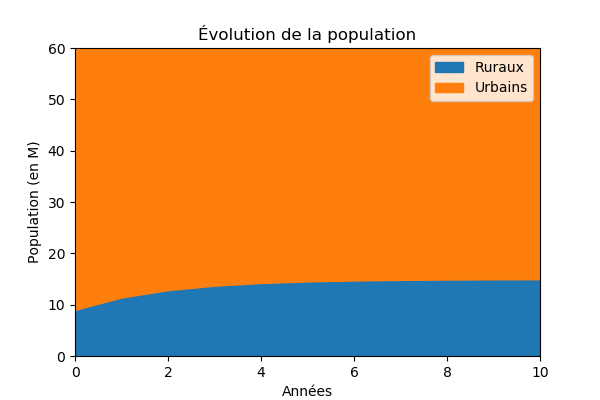

In [11]:
fig2 = plt.figure(figsize=(6, 4))

# cycle va permettre de prendre les couleurs dans l'ordre de la palette.
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

# Uniquement pour le skeleton:
# plt.plot(annee, pop[:,0], color=cycle[0])
# plt.plot(annee, pop[:,1], color=cycle[1])
# plt.plot(annee, total, color='k')

plt.title('Évolution de la population')
plt.xlabel('Années')
plt.ylim(0, total.mean())     # set the xlim to left, right
plt.xlim(0, n)     # set the xlim to left, right
plt.ylabel('Population (en M)')
# plt.plot()

plt.fill_between(annee, np.zeros(n + 1),
                 pop[:, 0], color=cycle[0], label='Ruraux')
plt.fill_between(annee, pop[:, 0], total, color=cycle[1],
                 label='Urbains')
plt.legend()
fig2.savefig("challenge_to_reproduce.pdf", format='pdf')

## Question : puissance de matrice

In [12]:
print(np.linalg.matrix_power(Mat,1000))
print(np.linalg.matrix_power(Mat,1001))

[[0.25 0.25]
 [0.75 0.75]]
[[0.25 0.25]
 [0.75 0.75]]


Remarque: pour les curieux de mathématiques on pourra aller voir https://fr.wikipedia.org/wiki/Cha%C3%AEne_de_Markov
et le théorème central de cette théorie: https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_de_Perron-Frobenius

## Question: évolution de la population et convergence.

In [13]:
pop_converence = np.linalg.matrix_power(Mat,1000) @ pop_init
pop_converence

array([15., 45.])

## Question: décomposition spectrale

In [14]:
eig_val, eig_vec = np.linalg.eig(Mat)

In [15]:
eig_val

array([0.6, 1. ])

In [16]:
eig_vec

array([[-0.70710678, -0.31622777],
       [ 0.70710678, -0.9486833 ]])

In [17]:
np.allclose(Mat, (eig_vec) @
            np.diag(eig_val) @ np.linalg.inv(eig_vec))

True

## Matrice à convergence

In [18]:
np.linalg.matrix_power(Mat,1000)

array([[0.25, 0.25],
       [0.75, 0.75]])

In [19]:
np.allclose(np.linalg.matrix_power(Mat, 1000), (eig_vec) @
            np.diag(eig_val ** 1000) @ np.linalg.inv(eig_vec))

True

In [20]:
np.linalg.matrix_power(Mat,1000) @ pop_init

array([15., 45.])

In [21]:
(eig_vec) @ np.diag([0., 1.]) @ np.linalg.inv(eig_vec)

array([[0.25, 0.25],
       [0.75, 0.75]])

# Exercice 2: 
**Fractales: l'ensemle de Mandelbrot**

In [22]:
# Paramètres pour l'affichage:
# équivalent de plt.axis('off') pour toutes les images
import matplotlib as mpl
mpl.rc('axes.spines', top=False, bottom=False, left=False, right=False)
mpl.rc(('xtick', 'ytick'), color=(1, 1, 1, 0))

In [23]:
def mandelbrot(max_iteration, hauteur, largeur, xmin, xmax, ymin, ymax):
    """Création de l'ensemble de Mandelbrot."""
    mandelbrot_mat = np.zeros((largeur, hauteur))
    for x in range(hauteur):
#         print('{}/{}'.format(x, hauteur))
        cx = (x * (xmax - xmin) / hauteur + xmin)
        for y in range(largeur):
            cy = (y * (ymin - ymax) / largeur + ymax)
            xn, yn, n = 0, 0, 0
            while (xn**2 + yn**2) < 4 and n < max_iteration:
                tmp_x, tmp_y = xn, yn
                xn = tmp_x**2 - tmp_y**2 + cx
                yn = 2 * tmp_x * tmp_y + cy
                n = n + 1
            if n < max_iteration:
                mandelbrot_mat[y, x] = 1.
    return mandelbrot_mat

<IPython.core.display.Javascript object>


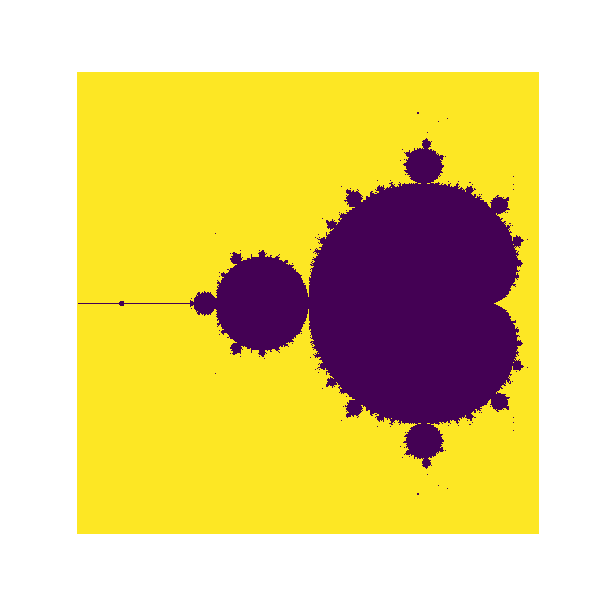

In [24]:
# Un exemple de visualisation de l'ensemble de Mandelbrot:

xmin, xmax, ymin, ymax = -2, 0.5, -1.25, 1.25
max_iteration = 100  # 1000 # high resolution
largeur, hauteur = 500, 500  # 1000 # high resolution
mandelbrot_mat = mandelbrot(max_iteration, hauteur,
                            largeur, xmin, xmax, ymin, ymax)
fig3 = plt.figure(figsize=((6, 6)))
plt.imshow(mandelbrot_mat)

# for saving:
# fig3.savefig("Mandelbrot.pdf", bbox_inches='tight',
#              pad_inches=0, transparent=True, format='pdf')

## Impact du nombre d'itérations:

In [25]:
max_iterations = [1, 2, 5, 10, 20, 50, 100]
largeur, hauteur = 1000, 1000  # taille de la fenêtre en pixels
nb_iterations = len(max_iterations)
mandelbrot_mats = np.zeros((largeur, hauteur, nb_iterations))

for row, max_iteration in enumerate(max_iterations):
    print('{}/{}'.format(row, nb_iterations))
    mandelbrot_mats[:, :, row] = mandelbrot(
        max_iteration, hauteur, largeur, xmin, xmax, ymin, ymax)

0/7
1/7
2/7
3/7
4/7
5/7
6/7


<IPython.core.display.Javascript object>


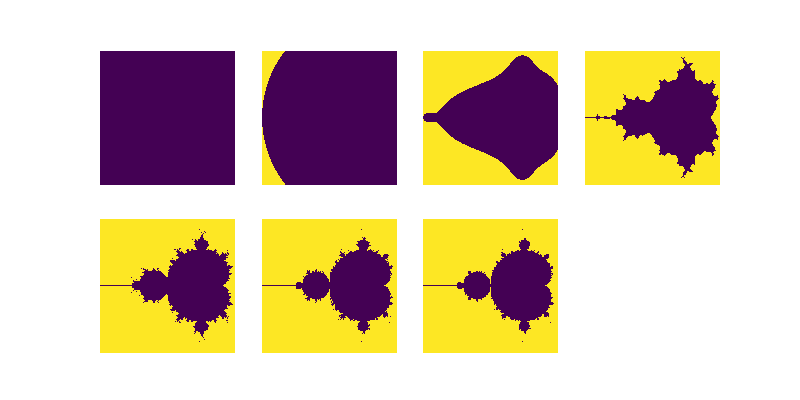

In [26]:
fig, axes = plt.subplots(2, 4, figsize=(8, 4))
axs = axes.ravel()
for i in range(len(max_iterations)):
    axs[i].imshow(mandelbrot_mats[:, :, i])
plt.show()

<IPython.core.display.Javascript object>


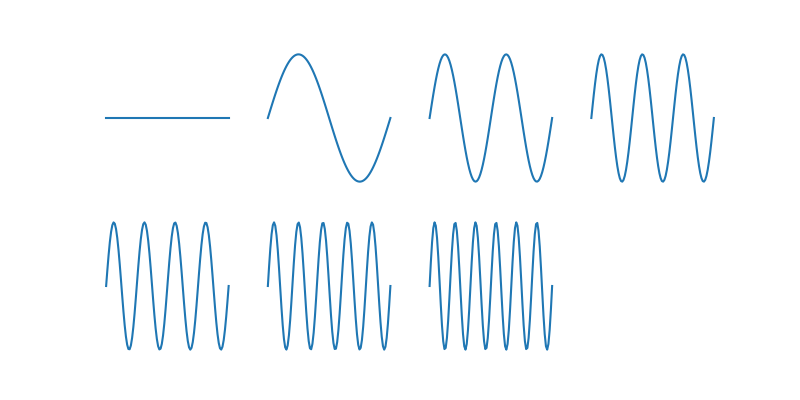

In [27]:
fig, axes = plt.subplots(2,4,figsize=(8,4))
axs = axes.ravel()
for i in range(len(max_iterations)):
    axs[i].plot(np.sin(np.linspace(0,1,num=100) * i *2  * np.pi))
plt.show()

In [28]:
def mandelbrot_color(max_iteration, hauteur, largeur, xmin, xmax, ymin, ymax):
    """Création de l'ensemble de Mandelbrot."""
    mandelbrot_mat = np.zeros((largeur, hauteur))
    for x in range(hauteur):
        cx = (x * (xmax - xmin) / hauteur + xmin)
        for y in range(largeur):
            cy = (y * (ymin - ymax) / largeur + ymax)
            xn, yn, n = 0, 0, 0
            while (xn**2 + yn**2) < 4 and n < max_iteration:
                tmp_x, tmp_y = xn, yn
                xn = tmp_x**2 - tmp_y**2 + cx
                yn = 2 * tmp_x * tmp_y + cy
                n = n + 1
            mandelbrot_mat[y, x] = max_iteration - n
    return mandelbrot_mat

<IPython.core.display.Javascript object>


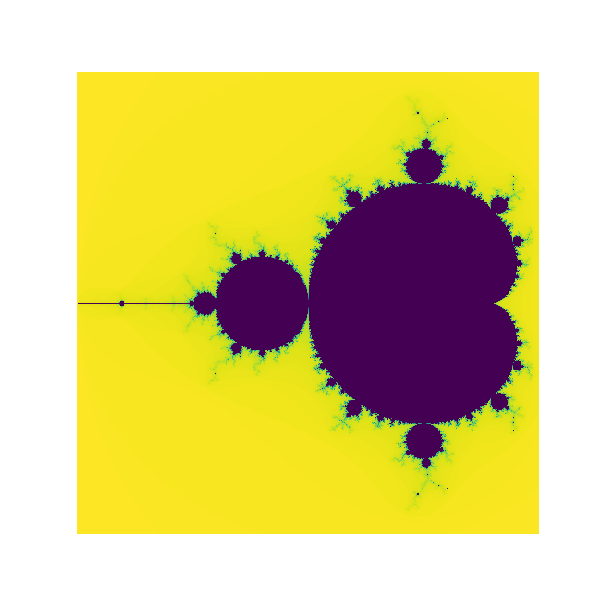

In [29]:
# Un exemple de visualisation de l'ensemble de Mandelbrot:

xmin, xmax, ymin, ymax = -2, 0.5, -1.25, 1.25
max_iteration = 200 # 1000 #high resolution
largeur, hauteur = 500, 500 # 1000 #high resolution
mandelbrot_mat = mandelbrot_color(max_iteration, hauteur, largeur, xmin, xmax, ymin, ymax)
fig5 = plt.figure(figsize=((6, 6)))
plt.imshow(mandelbrot_mat)

# # for saving:
# fig5.savefig("Mandelbrot_color.pdf", bbox_inches='tight',
#              pad_inches=0, transparent=True, format='pdf')